<a href="https://colab.research.google.com/github/Mukul1Panwar/Project/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

In [2]:
root_dir = f"Mukul_Panwar"

In [3]:
os.makedirs(f"{root_dir}/csv_files", exist_ok=True)
os.makedirs(f"{root_dir}/outputs", exist_ok=True)

In [42]:
greed = pd.read_csv("Mukul_Panwar/csv_files/fear_greed_index.csv")

In [43]:
greed.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [44]:
his_data = pd.read_csv("Mukul_Panwar/csv_files/historical_data.csv")

In [7]:
greed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [45]:
his_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [46]:
his_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [47]:
greed.isna().sum().sum()

np.int64(0)

In [48]:
his_data.isna().sum().sum()

np.int64(0)

In [49]:
greed['classification'].value_counts()

,count
classification,
Fear,781
Greed,633
Extreme Fear,508
Neutral,396
Extreme Greed,326


In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [51]:
greed['score'] = le.fit_transform(greed['classification'])

In [ ]:
# Fear : 2
# Extreme Fear : 0
# Neutral : 4
# Greed : 3
# Extreme Greed : 1

In [53]:
greed['date'] = pd.to_datetime(greed['date'],errors='coerce')

In [52]:
greed.head()

,timestamp,value,classification,date,score
0,1517463000,30,Fear,2018-02-01,2
1,1517549400,15,Extreme Fear,2018-02-02,0
2,1517635800,40,Fear,2018-02-03,2
3,1517722200,24,Extreme Fear,2018-02-04,0
4,1517808600,11,Extreme Fear,2018-02-05,0


In [60]:
his_data['date'] = pd.to_datetime(his_data['Timestamp IST'], errors='coerce')

In [62]:
# extract the dates from timestamps
his_data['date'] = his_data['date'].dt.date
his_data['date'] = pd.to_datetime(his_data['date'], errors='coerce')


In [63]:
greed.to_csv("Mukul_Panwar/csv_files/greed_data.csv",index=False)

In [64]:
his_data.to_csv("Mukul_Panwar/csv_files/his_data_new.csv",index=False)

In [65]:
new_df = his_data.merge(
    greed[['date','score','classification']],
    on='date',
    how='left'
)

In [66]:
new_df.to_csv("/content/Mukul_Panwar/csv_files/new_df.csv",index=False)

In [33]:
import seaborn as sns

In [72]:
print("new_df columns : ",new_df.columns)

new_df columns :  Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'score', 'classification'],
      dtype='object')


/tmp/ipython-input-3391695664.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(new_df['classification'],order=new_df['classification'].value_counts().index,palette='plasma')


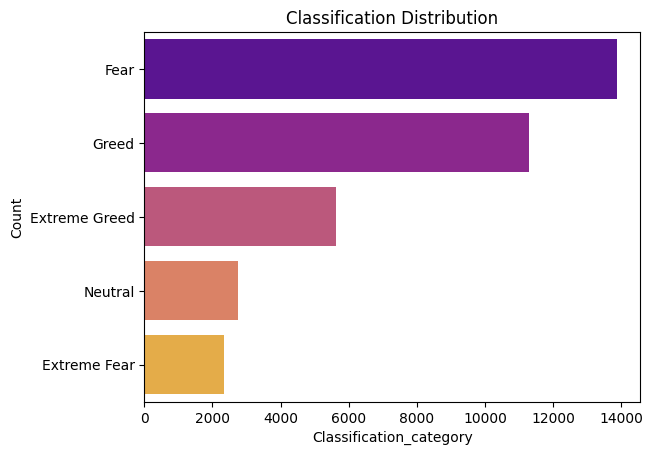

In [95]:
sns.countplot(new_df['classification'],order=new_df['classification'].value_counts().index,palette='plasma')
plt.title("Classification Distribution")
plt.xlabel("Classification_category")
plt.ylabel("Count")
plt.savefig("Mukul_Panwar/outputs/classification.png")
plt.show()



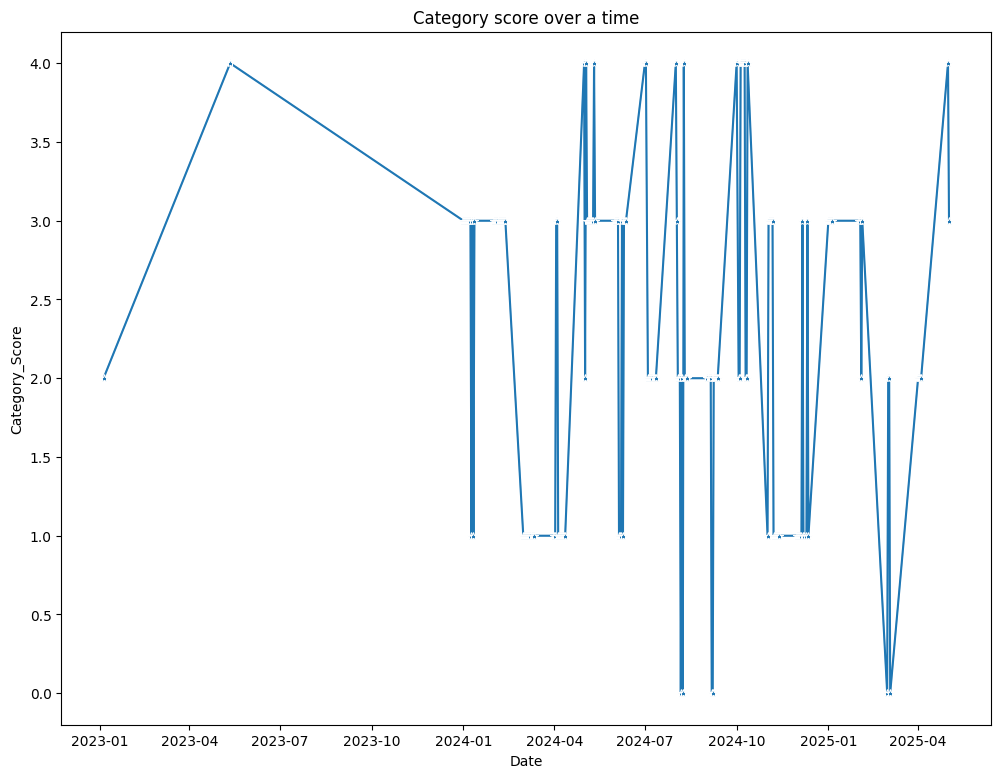

In [96]:
plt.figure(figsize=(12,9))
sns.lineplot(x='date',y='score',data = new_df,marker='*')
plt.title("Category score over a time")
plt.xlabel("Date")
plt.ylabel("Category_Score")
plt.savefig("Mukul_Panwar/outputs/category_score.png")
plt.show()

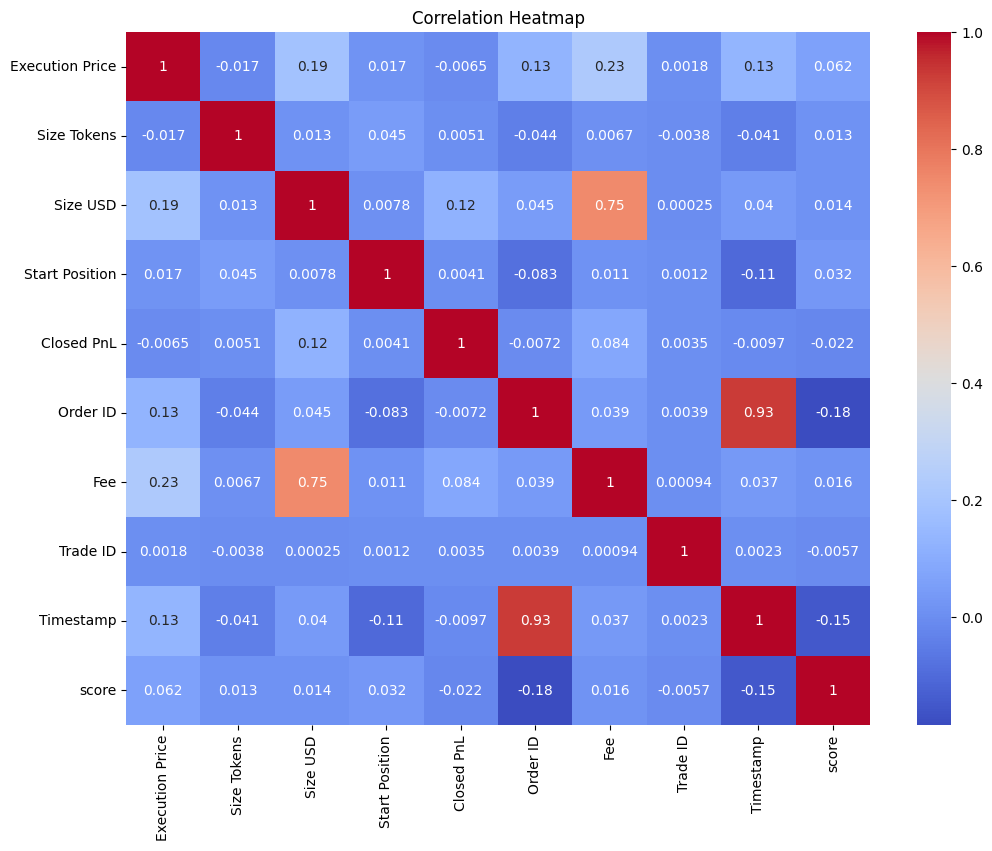

In [100]:
plt.figure(figsize=(12,9))

col = new_df.select_dtypes(include=[np.number])
corr = col.corr()

sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("Mukul_Panwar/outputs/correlation.png")
plt.show()